In [1]:
import numpy as np
from pandas import read_csv    

import time

from datetime import datetime
from numpy import mean

name="espalda0"

incT=50

series=read_csv(name+".tsv", sep="\t",parse_dates=False)
Y=read_csv(name+".L.tsv", sep="\t",parse_dates=False)

print(series.values)
            
    


[[ 7.00000000e-01  3.90000000e+00  7.50000000e+00  1.68840200e+12]
 [ 1.20000000e+00  5.50000000e+00  7.70000000e+00  1.68840200e+12]
 [ 1.80000000e+00  5.50000000e+00  8.20000000e+00  1.68840200e+12]
 ...
 [-6.00000000e-01 -3.40000000e+00  8.70000000e+00  1.68840219e+12]
 [-7.00000000e-01 -3.10000000e+00  9.20000000e+00  1.68840219e+12]
 [-1.40000000e+00 -1.30000000e+00  1.00000000e+01  1.68840219e+12]]


In [2]:
TY=np.array(Y["timestamp"])
LY=np.array(Y["label"])

print(TY)
print(LY)


lastT=-1
for i in range(0,len(TY)):
    if(LY[i]==0 or LY[i]==-1):
        TY[i]=TY[i]+lastT
        lastT=TY[i]
    if(LY[i]==1):
        lastT=TY[i]
    if(LY[i]==-1):
        lastT=-1
        
print(TY)
print(LY)


[ 29500   2500   2500   2000   2000   2500   2000   2000   2000   2500
   2500    500  67000   3000   2500   2000   2000   2500   2000   2000
   2000   2500   2000    500 107000   3000   2500   2000   2000   2500
   2000   2000   2000   2500   2000    500 151500   3000   2500   2000
   2000   2500   2000   2000   2500   2000   2000    500]
[ 1  0  0  0  0  0  0  0  0  0  0 -1  1  0  0  0  0  0  0  0  0  0  0 -1
  1  0  0  0  0  0  0  0  0  0  0 -1  1  0  0  0  0  0  0  0  0  0  0 -1]
[ 29500  32000  34500  36500  38500  41000  43000  45000  47000  49500
  52000  52500  67000  70000  72500  74500  76500  79000  81000  83000
  85000  87500  89500  90000 107000 110000 112500 114500 116500 119000
 121000 123000 125000 127500 129500 130000 151500 154500 157000 159000
 161000 163500 165500 167500 170000 172000 174000 174500]
[ 1  0  0  0  0  0  0  0  0  0  0 -1  1  0  0  0  0  0  0  0  0  0  0 -1
  1  0  0  0  0  0  0  0  0  0  0 -1  1  0  0  0  0  0  0  0  0  0  0 -1]


In [3]:
T=np.array(series["timestamp"])



t0=T[0]
tY0=TY[0]
tN=T[-1]
print(t0,tN)

tY0=int(tY0/incT)*incT
t0=int(t0/incT)*incT
tN=int(tN/incT)*incT

print(t0,tN, (int)(tN-t0)/1000)

X=[]
Y=[]
Z=[]
L=[]
TT=[]

v0=0
sesion=False
for ti in range(t0,tN,incT):
    print("ti:",ti, ti-t0)
    
    i=np.where( (TY>=ti-t0) & (TY<=ti+incT-t0))
    print("i2:",i[0], "LY:",LY[i[0]])
    
    if(len(i[0])>0):
        l=LY[i[0][0]]
        if(l==1):
            v0=0
            sesion=True
        if(l==-1):
            v0=0
            sesion=False    
        if(l==0):
            v0=0
        
    
    if(sesion):
        v0=v0+0.01
        print("v0:",v0)
        L.append(v0)
    else:
        L.append(0)
        
        
    i=np.where( (T>=ti) & (T<=ti+incT))
    print(i)
    print(series.values[i])
    
    x0=mean(series.values[i][:,0])
    y0=mean(series.values[i][:,1])
    z0=mean(series.values[i][:,2])
            
    if(sesion):
        X.append(x0)
        Y.append(y0)         
        Z.append(z0)
    else:
        X.append(x0)
        Y.append(y0)         
        Z.append(z0)     
    print(x0,y0,z0)    

    
        
    TT.append(ti-t0)
    
X=np.array(X)
Y=np.array(Y)
Z=np.array(Z)
L=np.array(L)
TT=np.array(TT)



1688402004069 1688402188049
1688402004050 1688402188000 183.95
ti: 1688402004050 0
i2: [] LY: []
(array([0, 1], dtype=int64),)
[[7.000000e-01 3.900000e+00 7.500000e+00 1.688402e+12]
 [1.200000e+00 5.500000e+00 7.700000e+00 1.688402e+12]]
0.95 4.7 7.6
ti: 1688402004100 50
i2: [] LY: []
(array([2, 3, 4], dtype=int64),)
[[1.800000e+00 5.500000e+00 8.200000e+00 1.688402e+12]
 [1.900000e+00 5.200000e+00 8.300000e+00 1.688402e+12]
 [1.800000e+00 4.800000e+00 7.900000e+00 1.688402e+12]]
1.8333333333333333 5.166666666666667 8.133333333333333
ti: 1688402004150 100
i2: [] LY: []
(array([5, 6], dtype=int64),)
[[1.100000e+00 4.900000e+00 7.700000e+00 1.688402e+12]
 [9.000000e-01 4.800000e+00 7.600000e+00 1.688402e+12]]
1.0 4.85 7.65
ti: 1688402004200 150
i2: [] LY: []
(array([7, 8, 9], dtype=int64),)
[[1.400000e+00 4.700000e+00 7.900000e+00 1.688402e+12]
 [1.900000e+00 4.900000e+00 8.100000e+00 1.688402e+12]
 [2.000000e+00 5.000000e+00 8.100000e+00 1.688402e+12]]
1.7666666666666666 4.8666666666666

11.9 -0.8500000000000001 -0.75
ti: 1688402032600 28550
i2: [] LY: []
(array([1427, 1428, 1429], dtype=int64),)
[[ 1.14000000e+01 -9.00000000e-01 -9.00000000e-01  1.68840203e+12]
 [ 1.09000000e+01 -8.00000000e-01 -1.30000000e+00  1.68840203e+12]
 [ 1.10000000e+01 -1.40000000e+00 -7.00000000e-01  1.68840203e+12]]
11.1 -1.0333333333333334 -0.9666666666666668
ti: 1688402032650 28600
i2: [] LY: []
(array([1430, 1431], dtype=int64),)
[[ 1.06000000e+01 -9.00000000e-01 -7.00000000e-01  1.68840203e+12]
 [ 1.06000000e+01 -1.10000000e+00 -4.00000000e-01  1.68840203e+12]]
10.6 -1.0 -0.55
ti: 1688402032700 28650
i2: [] LY: []
(array([1432, 1433, 1434], dtype=int64),)
[[ 1.10000000e+01 -1.30000000e+00 -1.10000000e+00  1.68840203e+12]
 [ 1.09000000e+01 -9.00000000e-01 -1.20000000e+00  1.68840203e+12]
 [ 1.07000000e+01 -3.00000000e-01 -1.40000000e+00  1.68840203e+12]]
10.866666666666665 -0.8333333333333334 -1.2333333333333332
ti: 1688402032750 28700
i2: [] LY: []
(array([1435, 1436], dtype=int64),)
[[

7.55 -4.6 -3.2
ti: 1688402036500 32450
i2: [] LY: []
v0: 0.09999999999999999
(array([1622, 1623, 1624], dtype=int64),)
[[ 7.60000000e+00 -6.40000000e+00 -1.20000000e+00  1.68840204e+12]
 [ 7.90000000e+00 -4.10000000e+00 -3.00000000e+00  1.68840204e+12]
 [ 7.40000000e+00 -4.60000000e+00 -3.20000000e+00  1.68840204e+12]]
7.633333333333333 -5.033333333333333 -2.466666666666667
ti: 1688402036550 32500
i2: [] LY: []
v0: 0.10999999999999999
(array([1625, 1626], dtype=int64),)
[[ 7.60000000e+00 -6.20000000e+00 -2.10000000e+00  1.68840204e+12]
 [ 8.70000000e+00 -5.80000000e+00 -2.00000000e+00  1.68840204e+12]]
8.149999999999999 -6.0 -2.05
ti: 1688402036600 32550
i2: [] LY: []
v0: 0.11999999999999998
(array([1627, 1628, 1629], dtype=int64),)
[[ 8.10000000e+00 -3.50000000e+00 -3.60000000e+00  1.68840204e+12]
 [ 8.00000000e+00 -5.40000000e+00 -2.30000000e+00  1.68840204e+12]
 [ 9.10000000e+00 -6.90000000e+00 -1.10000000e+00  1.68840204e+12]]
8.4 -5.266666666666667 -2.3333333333333335
ti: 16884020

[[ 8.10000000e+00 -3.10000000e+00  2.90000000e+00  1.68840207e+12]
 [ 8.10000000e+00 -3.80000000e+00  2.70000000e+00  1.68840207e+12]]
8.1 -3.45 2.8
ti: 1688402067000 62950
i2: [] LY: []
(array([3147, 3148, 3149], dtype=int64),)
[[ 8.20000000e+00 -4.30000000e+00  2.30000000e+00  1.68840207e+12]
 [ 8.20000000e+00 -3.70000000e+00  2.40000000e+00  1.68840207e+12]
 [ 8.50000000e+00 -3.40000000e+00  2.60000000e+00  1.68840207e+12]]
8.299999999999999 -3.8000000000000003 2.433333333333333
ti: 1688402067050 63000
i2: [] LY: []
(array([3150, 3151], dtype=int64),)
[[ 8.70000000e+00 -4.30000000e+00  2.30000000e+00  1.68840207e+12]
 [ 8.50000000e+00 -3.80000000e+00  2.50000000e+00  1.68840207e+12]]
8.6 -4.05 2.4
ti: 1688402067100 63050
i2: [] LY: []
(array([3152, 3153, 3154], dtype=int64),)
[[ 8.40000000e+00 -3.10000000e+00  2.80000000e+00  1.68840207e+12]
 [ 8.80000000e+00 -3.30000000e+00  1.60000000e+00  1.68840207e+12]
 [ 8.80000000e+00 -2.70000000e+00  2.00000000e+00  1.68840207e+12]]
8.666666

(array([3405, 3406], dtype=int64),)
[[ 1.00000000e+01 -3.00000000e+00 -1.50000000e+00  1.68840207e+12]
 [ 1.04000000e+01 -2.90000000e+00 -9.00000000e-01  1.68840207e+12]]
10.2 -2.95 -1.2
ti: 1688402072200 68150
i2: [] LY: []
v0: 0.24000000000000007
(array([3407, 3408, 3409], dtype=int64),)
[[ 1.02000000e+01 -3.00000000e+00 -8.00000000e-01  1.68840207e+12]
 [ 1.04000000e+01 -3.10000000e+00 -7.00000000e-01  1.68840207e+12]
 [ 9.80000000e+00 -3.10000000e+00 -9.00000000e-01  1.68840207e+12]]
10.133333333333335 -3.0666666666666664 -0.7999999999999999
ti: 1688402072250 68200
i2: [] LY: []
v0: 0.25000000000000006
(array([3410, 3411], dtype=int64),)
[[ 9.70000000e+00 -2.90000000e+00 -7.00000000e-01  1.68840207e+12]
 [ 9.80000000e+00 -3.10000000e+00 -1.10000000e+00  1.68840207e+12]]
9.75 -3.0 -0.9
ti: 1688402072300 68250
i2: [] LY: []
v0: 0.26000000000000006
(array([3412, 3413, 3414], dtype=int64),)
[[ 1.00000000e+01 -3.00000000e+00 -1.50000000e+00  1.68840207e+12]
 [ 1.04000000e+01 -2.90000000

[[ 1.1300000e+01 -1.2000000e+00  1.5000000e+00  1.6884021e+12]
 [ 1.0900000e+01 -1.0000000e-01  2.0000000e+00  1.6884021e+12]
 [ 1.0300000e+01 -3.0000000e-01  2.1000000e+00  1.6884021e+12]]
10.833333333333334 -0.5333333333333333 1.8666666666666665
ti: 1688402102850 98800
i2: [] LY: []
(array([4940, 4941], dtype=int64),)
[[9.9000000e+00 5.0000000e-01 1.6000000e+00 1.6884021e+12]
 [9.8000000e+00 9.0000000e-01 1.8000000e+00 1.6884021e+12]]
9.850000000000001 0.7 1.7000000000000002
ti: 1688402102900 98850
i2: [] LY: []
(array([4942, 4943, 4944], dtype=int64),)
[[ 9.5000000e+00  2.0000000e-01  1.5000000e+00  1.6884021e+12]
 [ 9.6000000e+00 -1.0000000e-01  1.4000000e+00  1.6884021e+12]
 [ 9.6000000e+00  3.0000000e-01  6.0000000e-01  1.6884021e+12]]
9.566666666666668 0.13333333333333333 1.1666666666666667
ti: 1688402102950 98900
i2: [] LY: []
(array([4945, 4946], dtype=int64),)
[[ 9.3000000e+00 -1.7000000e+00  1.2000000e+00  1.6884021e+12]
 [ 9.4000000e+00 -3.5000000e+00  1.7000000e+00  1.6884

(array([6590, 6591], dtype=int64),)
[[ 1.15000000e+01 -3.30000000e+00 -2.00000000e-01  1.68840214e+12]
 [ 9.90000000e+00 -2.90000000e+00 -4.00000000e-01  1.68840214e+12]]
10.7 -3.0999999999999996 -0.30000000000000004
ti: 1688402135900 131850
i2: [] LY: []
(array([6592, 6593, 6594], dtype=int64),)
[[ 9.30000000e+00 -2.90000000e+00 -7.00000000e-01  1.68840214e+12]
 [ 9.40000000e+00 -2.70000000e+00 -6.00000000e-01  1.68840214e+12]
 [ 9.30000000e+00 -2.50000000e+00 -8.00000000e-01  1.68840214e+12]]
9.333333333333334 -2.6999999999999997 -0.6999999999999998
ti: 1688402135950 131900
i2: [] LY: []
(array([6595, 6596], dtype=int64),)
[[ 8.60000000e+00 -2.40000000e+00 -7.00000000e-01  1.68840214e+12]
 [ 8.70000000e+00 -2.50000000e+00 -3.00000000e-01  1.68840214e+12]]
8.649999999999999 -2.45 -0.5
ti: 1688402136000 131950
i2: [] LY: []
(array([6597, 6598, 6599], dtype=int64),)
[[ 8.70000000e+00 -2.60000000e+00  3.00000000e-01  1.68840214e+12]
 [ 8.30000000e+00 -2.90000000e+00  0.00000000e+00  1.68

8.933333333333332 -5.833333333333333 -2.3666666666666667
ti: 1688402170150 166100
i2: [] LY: []
v0: 0.12999999999999998
(array([8305, 8306], dtype=int64),)
[[ 9.10000000e+00 -6.00000000e+00 -1.50000000e+00  1.68840217e+12]
 [ 9.00000000e+00 -4.80000000e+00 -2.00000000e+00  1.68840217e+12]]
9.05 -5.4 -1.75
ti: 1688402170200 166150
i2: [] LY: []
v0: 0.13999999999999999
(array([8307, 8308, 8309], dtype=int64),)
[[ 8.30000000e+00 -4.20000000e+00 -1.40000000e+00  1.68840217e+12]
 [ 8.40000000e+00 -4.70000000e+00 -2.00000000e+00  1.68840217e+12]
 [ 8.90000000e+00 -5.00000000e+00 -1.70000000e+00  1.68840217e+12]]
8.533333333333333 -4.633333333333334 -1.7
ti: 1688402170250 166200
i2: [] LY: []
v0: 0.15
(array([8310, 8311], dtype=int64),)
[[ 9.20000000e+00 -4.00000000e+00 -1.30000000e+00  1.68840217e+12]
 [ 1.00000000e+01 -5.20000000e+00 -1.00000000e-01  1.68840217e+12]]
9.6 -4.6 -0.7000000000000001
ti: 1688402170300 166250
i2: [] LY: []
v0: 0.16
(array([8312, 8313, 8314], dtype=int64),)
[[ 1.0

In [4]:
import matplotlib.pyplot as plt


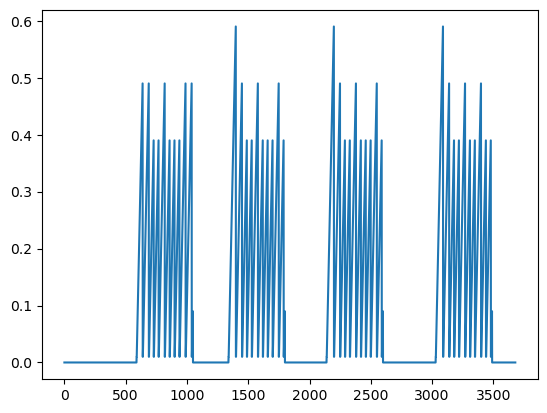

In [5]:
plt.figure()
plt.plot(L)
plt.show()

<AxesSubplot:xlabel='Time'>

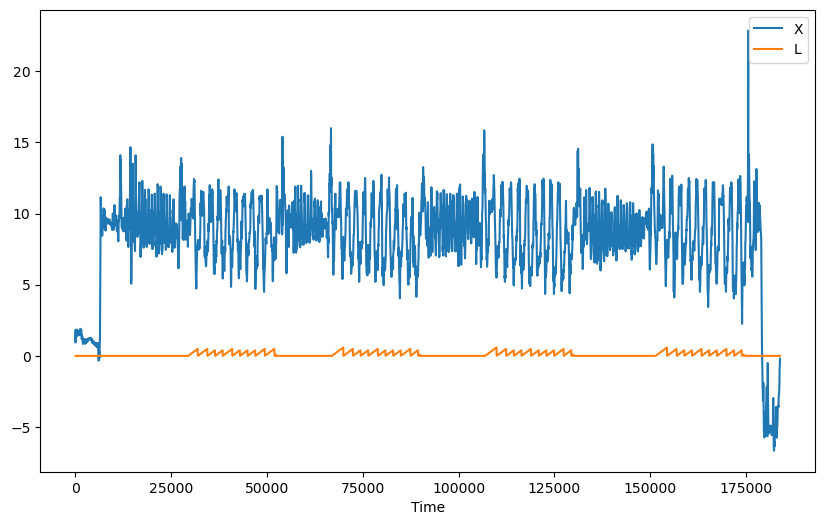

In [6]:
import pandas as pd

df = pd.DataFrame()
df['Time']=TT
df['X']=X
df['L']=L

df.plot(x="Time", legend=True, figsize=(10,6))

<AxesSubplot:xlabel='Time'>

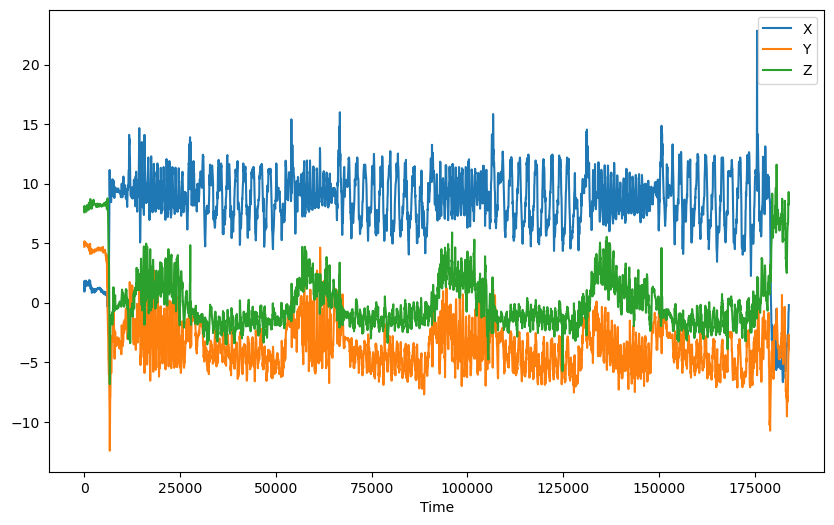

In [7]:
df = pd.DataFrame()
df['Time']=TT
df['X']=X
df['Y']=Y
df['Z']=Z

df.plot(x="Time", legend=True, figsize=(10,6))